In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [5]:
dados = pd.read_csv('KNN_Project_Data')

In [7]:
dados.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

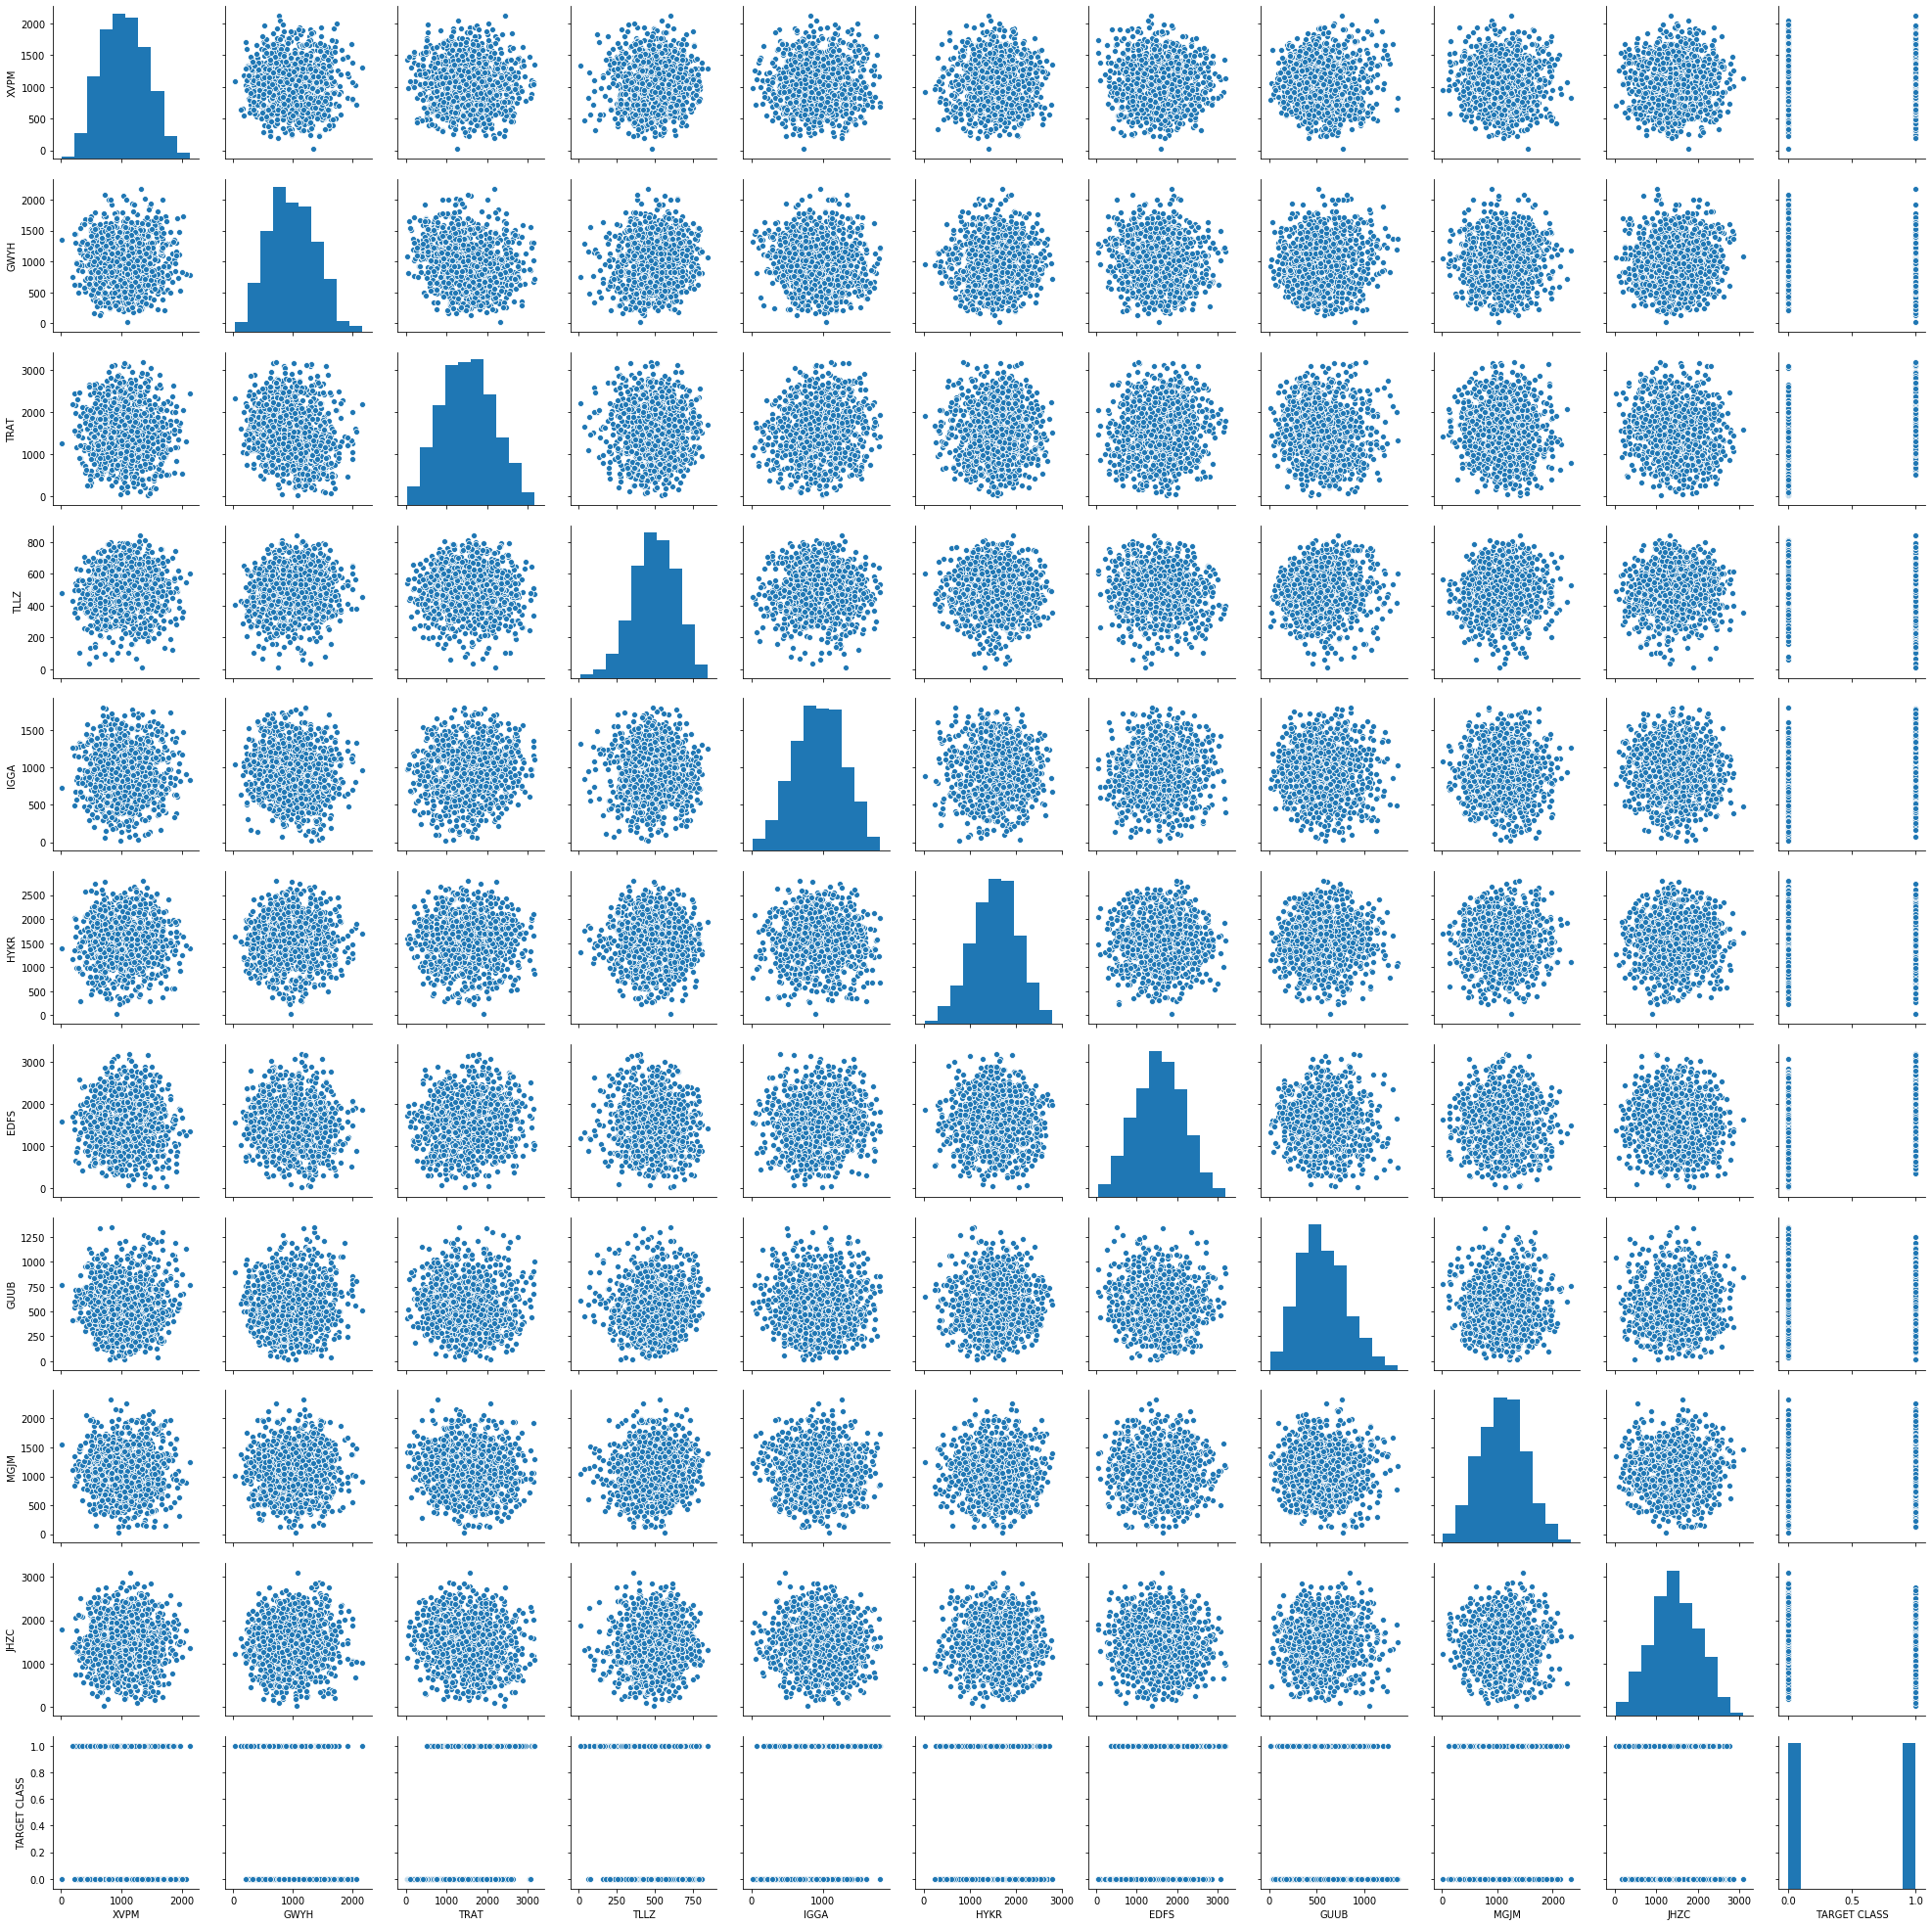

In [9]:
sns.pairplot(dados, palette='coolwarm')

In [10]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [35]:
X = dados.drop('TARGET CLASS', axis=1)

In [37]:
y = dados['TARGET CLASS']

In [20]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
dados_normalizados = scaler.transform(X)

In [28]:
colunas = dados.columns[:-1]

In [30]:
dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=colunas)

In [32]:
dados_normalizados_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [34]:
# divisão treino / teste
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dados_normalizados_df, y, test_size=0.3)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [47]:
# treino
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [49]:
# predições
predicoes = knn.predict(X_test)

In [51]:
# avaliar
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76       166
           1       0.69      0.77      0.73       134

    accuracy                           0.74       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.75      0.74      0.74       300



In [55]:
print(confusion_matrix(y_test, predicoes))

[[120  46]
 [ 31 103]]


In [60]:
#vamos encontrar um k adequado
erros = []
faixa = range(1,40)
for valor_k in faixa:
    knn1 = KNeighborsClassifier(n_neighbors=valor_k)
    knn1.fit(X_train, y_train)
    predicao_determinado_k = knn1.predict(X_test)
    erros.append(np.mean(predicao_determinado_k != y_test))

Text(0, 0.5, 'Erro')

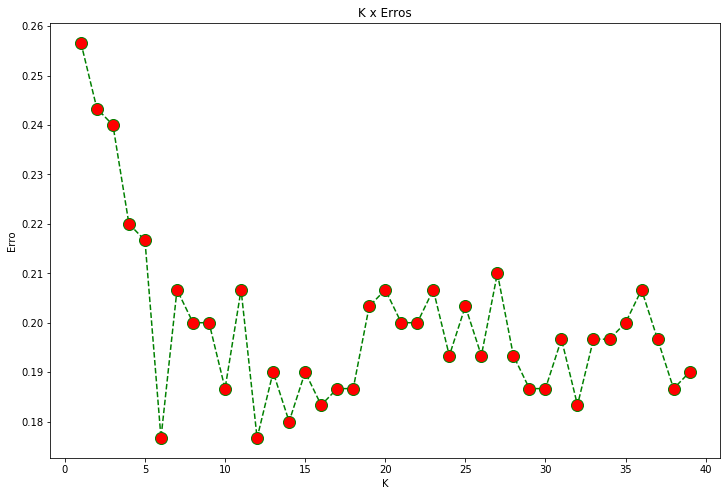

In [67]:
plt.figure(figsize=(12,8))
plt.plot(faixa, erros, color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
plt.title('K x Erros')
plt.xlabel('K')
plt.ylabel('Erro')

In [69]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)
predicao6 = knn6.predict(X_test)


In [70]:
print(classification_report(y_test, predicao6))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       166
           1       0.81      0.79      0.80       134

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

